OES data collected during the ALD using NH3 and N2 onto an - wafer

In [24]:
import os
path = 'test_20241206'
file = os.listdir(path)
print(len(file), ';', file[0])

42 ; test_20241206133831.csv


In [30]:
import pandas as pd
df = pd.read_csv(path+'/'+file[0], index_col='Time')
df.head()

,49.751256,50.252262,50.753331,51.254464,51.755659,52.256918,52.758239,53.259624,53.761071,54.262582,...,1186.378766,1186.985666,1187.592607,1188.199588,1188.806610,1189.413673,1190.020777,1190.627921,1191.235106,1191.842332
Time,,,,,,,,,,,,,,,,,,,,,
0.000,5.0,6.0,7.0,4.0,3.0,6.0,2.0,0.0,-8.0,-2.0,...,-4.0,-9.0,-3.0,-11.0,-3.0,7.0,-8.0,-5.0,-8.0,-7.0
1.016,6.0,3.0,13.0,3.0,7.0,13.0,-6.0,0.0,-1.0,4.0,...,-14.0,-4.0,-12.0,-11.0,-7.0,2.0,-6.0,-5.0,-8.0,-5.0
2.016,-2.0,6.0,13.0,8.0,6.0,14.0,0.0,-3.0,0.0,5.0,...,-10.0,-3.0,-3.0,3.0,-5.0,5.0,-11.0,-9.0,-10.0,-8.0


In [32]:
# find a file where an intensity peak appear
max_val = []
for i in range(len(file)):
    df_temp = pd.read_csv(path+'/'+file[i], index_col='Time')
    max_val.append(df_temp.max(axis=1).max())
pd.Series(max_val)

0        19.0
1        25.0
2     12560.0
3     12358.0
4     59394.0
5     58654.0
6     57992.0
7     56926.0
8     57125.0
9     57060.0
10    56733.0
11    56700.0
12    56609.0
13    55358.0
14    55657.0
15    54430.0
16    54502.0
17    55937.0
18    55924.0
19    55784.0
20    55936.0
21    55146.0
22    55084.0
23    55606.0
24    54680.0
25    55726.0
26    55232.0
27    55413.0
28    55466.0
29    55490.0
30      168.0
31      136.0
32      129.0
33      705.0
34     1627.0
35      130.0
36      130.0
37      227.0
38      135.0
39      136.0
40      205.0
41      131.0
dtype: float64

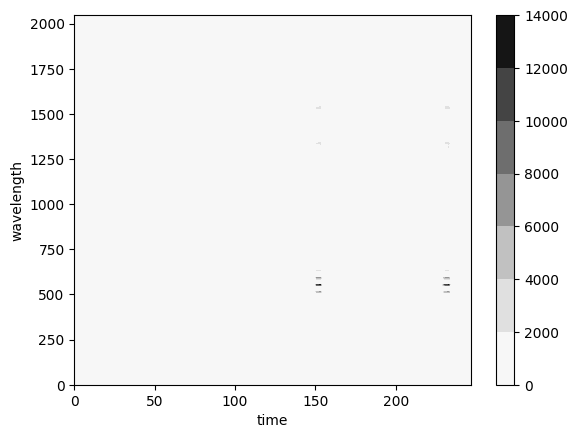

In [77]:
# test with file[2]
df = pd.read_csv(path+'/'+file[2], index_col='Time')

x = range(len(df.index))
y = range(len(df.columns))

# replace negative values with zero
for i in x:
    for j in y:
        if df.iloc[i,j]<0:
            df.iloc[i,j]=0
            
X, Y = np.meshgrid(x, y)
Z = df.T

plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time')
plt.ylabel('wavelength')
plt.colorbar()
plt.show()

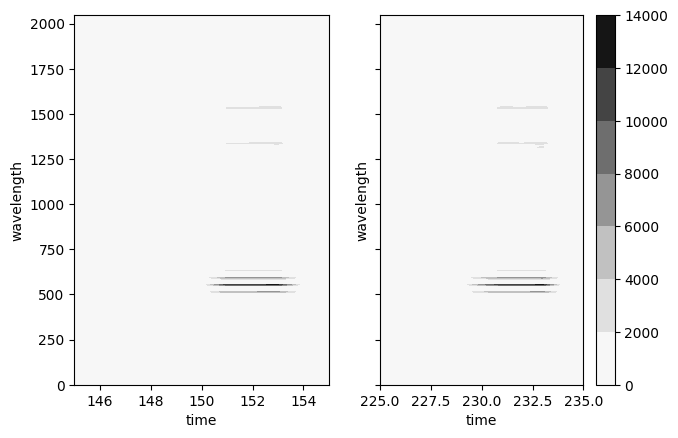

In [84]:
fig, axs = plt.subplots(1, 2, sharey=True)

im = axs[0].contourf(X, Y, Z, cmap='Greys')
axs[0].set(xlim=(145,155), xlabel='time', ylabel='wavelength')
im = axs[1].contourf(X, Y, Z, cmap='Greys')
axs[1].set(xlim=(225,235), xlabel='time', ylabel='wavelength')    

fig.subplots_adjust(right=1)
fig.colorbar(im)

plt.show()

In [168]:
# to find numbers close to 100, 200, ..., 1100
cst_xticks = []
target = 100
for elem in df.columns:
    if int(elem.split('.')[0]) == target:
        cst_xticks.append(elem)
        target += 100
cst_xticks

['100.162504',
 '200.238557',
 '300.470150',
 '400.105102',
 '500.016226',
 '600.046192',
 '700.045612',
 '800.450751',
 '900.565472',
 '1000.261283',
 '1100.017577']

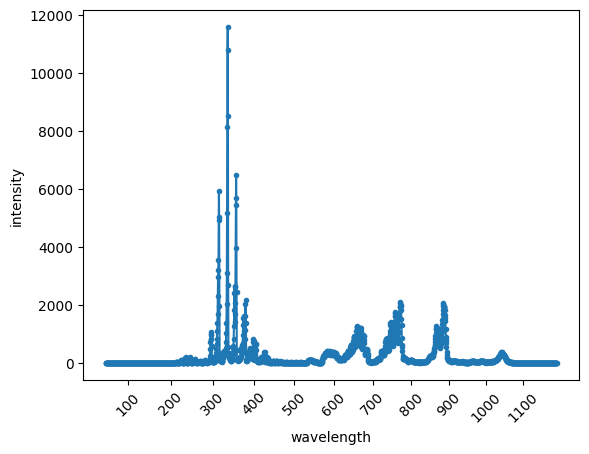

In [170]:
# scatter plot to find peak wavelengths -> peak intensity
plt.plot(df.iloc[152,:],'.-')
plt.xlabel('wavelength')
plt.xticks(cst_xticks, labels=[int(float(x)) for x in cst_xticks], rotation = 45)
plt.ylabel('intensity')
plt.show()

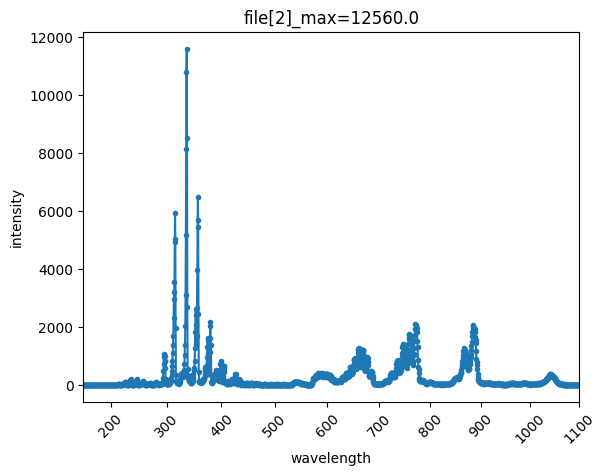

In [185]:
plt.plot(df.iloc[152,:],'.-')
plt.xlabel('wavelength')
plt.xlim(200,1100)
plt.xticks(cst_xticks[1:], labels=[int(float(x)) for x in cst_xticks[1:]], rotation = 45)
plt.ylabel('intensity')
plt.title('file[2]_max=12560.0')
plt.show()

In [ ]:
# method to find local maximums

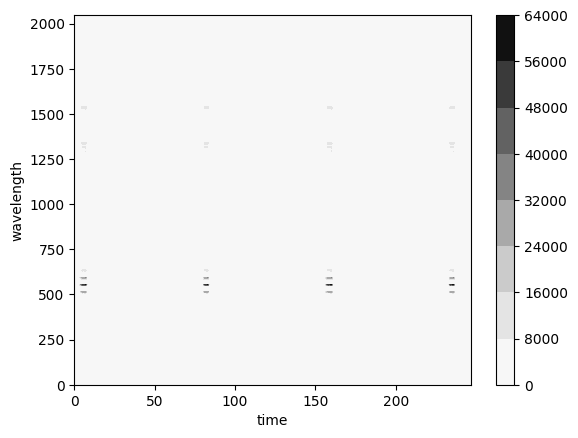

In [190]:
# test with file[4] 
df = pd.read_csv(path+'/'+file[4], index_col='Time')

x = range(len(df.index))
y = range(len(df.columns))

# replace negative values with zero
for i in x:
    for j in y:
        if df.iloc[i,j]<0:
            df.iloc[i,j]=0
            
X, Y = np.meshgrid(x, y)
Z = df.T

plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time')
plt.ylabel('wavelength')
plt.colorbar()
plt.show()

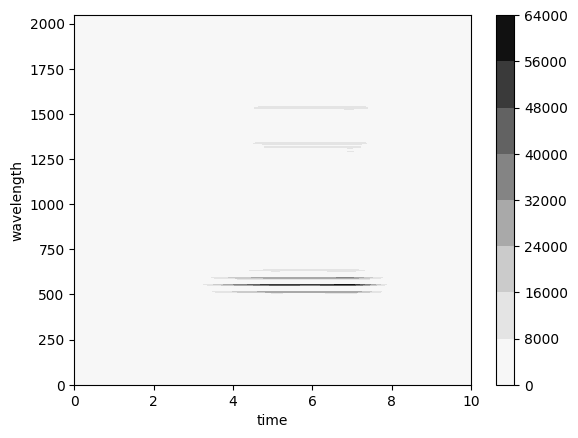

In [192]:
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time')
plt.xlim(0,10)
plt.ylabel('wavelength')
plt.colorbar()
plt.show()

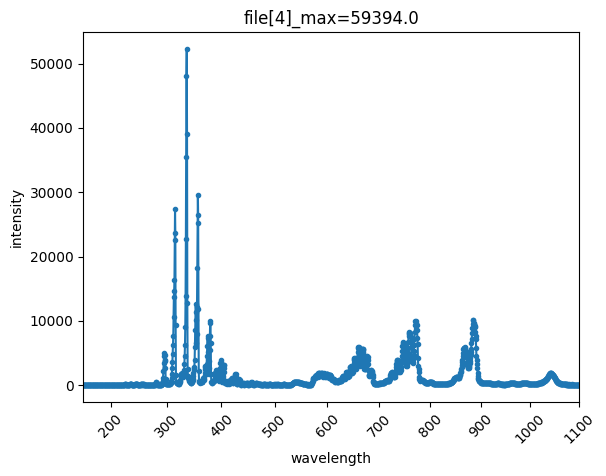

In [193]:
plt.plot(df.iloc[6,:],'.-')
plt.xlabel('wavelength')
plt.xlim(200,1100)
plt.xticks(cst_xticks[1:], labels=[int(float(x)) for x in cst_xticks[1:]], rotation = 45)
plt.ylabel('intensity')
plt.title('file[4]_max=59394.0')
plt.show()